In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

In [4]:
df_apple = pd.read_csv("AAPL.csv")
df_google = pd.read_csv("GOOG.csv")

In [5]:
df_apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-07,40.522499,40.560001,40.090000,40.314999,38.261566,87714000
1,2017-09-08,40.215000,40.287498,39.632500,39.657501,37.637562,114446000
2,2017-09-11,40.125000,40.512501,39.972500,40.375000,38.318501,126323200
3,2017-09-12,40.652500,40.990002,39.692501,40.215000,38.166664,286856000
4,2017-09-13,39.967499,39.990002,39.477501,39.912498,37.879570,179629600
...,...,...,...,...,...,...,...
1253,2022-08-30,162.130005,162.559998,157.720001,158.910004,158.910004,77906200
1254,2022-08-31,160.309998,160.580002,157.139999,157.220001,157.220001,87991100
1255,2022-09-01,156.639999,158.419998,154.669998,157.960007,157.960007,74229900
1256,2022-09-02,159.750000,160.360001,154.970001,155.809998,155.809998,76905200


In [6]:
df_google["Date"].head(20)

0     2017-09-07
1     2017-09-08
2     2017-09-11
3     2017-09-12
4     2017-09-13
5     2017-09-14
6     2017-09-15
7     2017-09-18
8     2017-09-19
9     2017-09-20
10    2017-09-21
11    2017-09-22
12    2017-09-25
13    2017-09-26
14    2017-09-27
15    2017-09-28
16    2017-09-29
17    2017-10-02
18    2017-10-03
19    2017-10-04
Name: Date, dtype: object

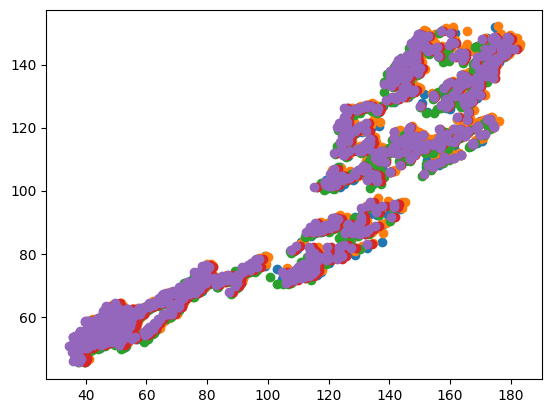

In [7]:
plt.scatter(df_apple["Open"], df_google["Open"])
plt.scatter(df_apple["High"], df_google["High"])
plt.scatter(df_apple["Low"], df_google["Low"])
plt.scatter(df_apple["Close"], df_google["Close"])
plt.scatter(df_apple["Adj Close"], df_google["Adj Close"])
#plt.scatter(df_apple["Volume"], df_google["Volume"])

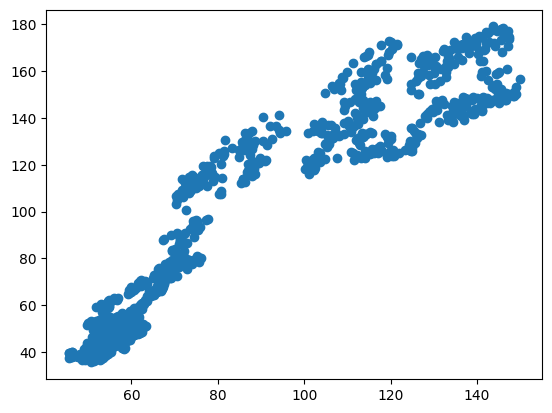

In [8]:
plt.scatter(df_google["Low"], df_apple["Low"])


In [9]:
x_n = df_google["High"]
y_n = df_apple["High"]

In [10]:
x_n

0        46.820499
1        46.849499
2        46.918999
3        46.674000
4        46.862499
           ...    
1253    111.370003
1254    111.769997
1255    111.220001
1256    111.675003
1257    108.879997
Name: High, Length: 1258, dtype: float64

In [11]:
df = pd.DataFrame({'x':x_n,'y':y_n})

In [12]:
df

,x,y
0,46.820499,40.560001
1,46.849499,40.287498
2,46.918999,40.512501
3,46.674000,40.990002
4,46.862499,39.990002
...,...,...
1253,111.370003,162.559998
1254,111.769997,160.580002
1255,111.220001,158.419998
1256,111.675003,160.360001


# Analiza jednowymiarowa

### Miary położenia

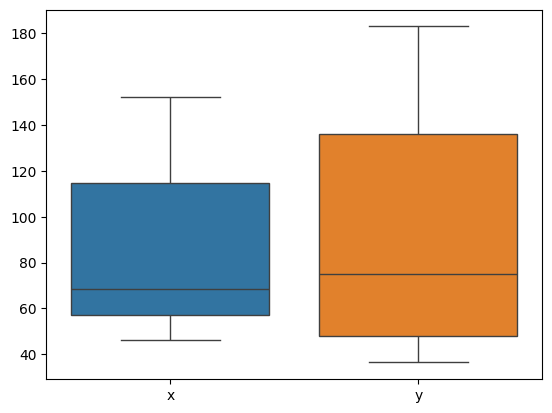

In [11]:
sns.boxplot(data = df);

Text(0.5, 1.0, 'Histogram najwyższej ceny akcji dla Google')

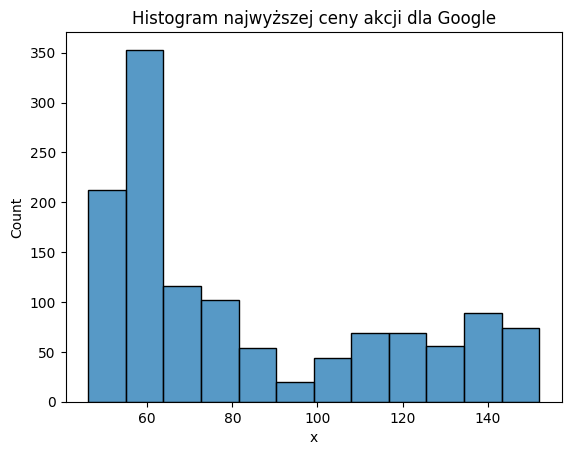

In [12]:
sns.histplot(df["x"])
plt.title("Histogram najwyższej ceny akcji dla Google")

Text(0.5, 1.0, 'Histogram najwyższej ceny akcji dla Apple')

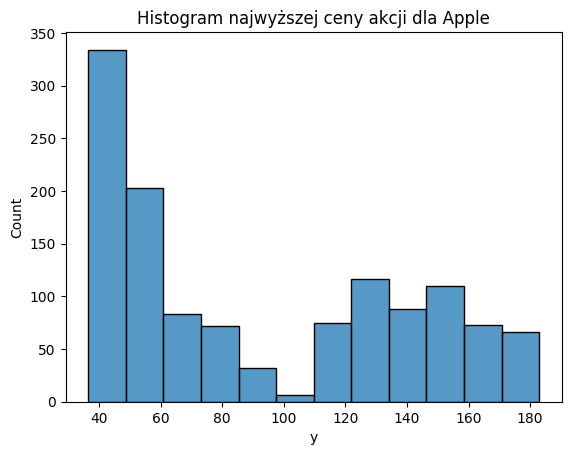

In [13]:
sns.histplot(df["y"])

plt.title("Histogram najwyższej ceny akcji dla Apple")

Text(0.5, 1.0, 'Gęstość empiryczna dla najwyższych cen akcji dla obu firm')

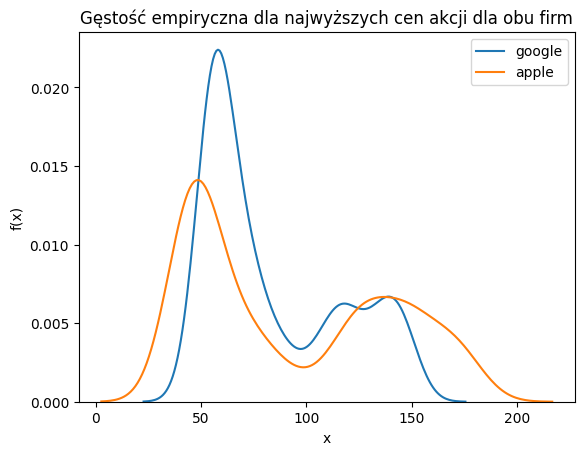

In [14]:
sns.kdeplot(data = df["x"])
sns.kdeplot(df["y"])
plt.legend(labels=['google', 'apple'])
plt.ylabel("f(x)")
plt.title("Gęstość empiryczna dla najwyższych cen akcji dla obu firm")

Text(0.5, 1.0, 'Dystrybuanta empiryczna dla najwyższych cen akcji dla obu firm')

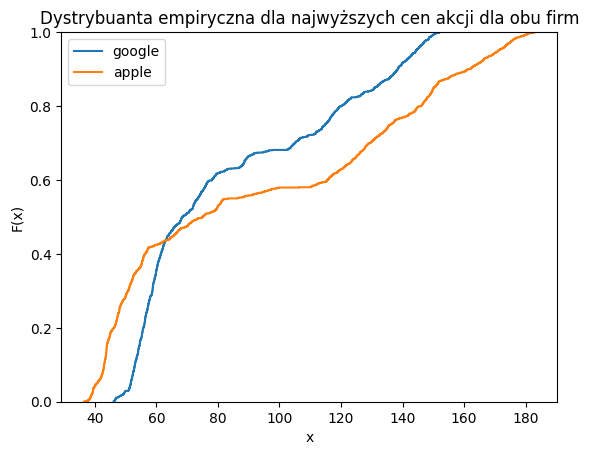

In [15]:
sns.ecdfplot(df["x"])
sns.ecdfplot(df["y"])
plt.ylabel("F(x)")
plt.legend(labels=['google', 'apple'])
plt.title("Dystrybuanta empiryczna dla najwyższych cen akcji dla obu firm")

In [19]:
np.mean(x_n), np.mean(y_n)

(83.81941737519873, 92.45871236168522)

In [21]:
scipy.stats.hmean(x_n), scipy.stats.hmean(y_n)

(73.4653525129012, 70.72328834794956)

In [22]:
def TrimmedMean(Xn, k): # srednia ucinana
    X = np.sort(Xn)
    n = int(len(X))
    result = 0
    for i in range(int(k), int(n-k)):
        result += X[i]
    return result/(n-2*k)

In [42]:
def plotTrimmedMean(sample, firma):
  k = np.arange(0, (len(sample)/2)-1, 1)
  Tm = [TrimmedMean(sample,x) for x in k]
  plt.plot(k, Tm)
  plt.plot(k, [np.median(sample) for x in k], label="mediana")
  plt.title("średnia ucinana dla {}".format(firma))
  plt.xlabel("k")
  plt.ylabel("wartości średniej ucinanej dla danego k")
  plt.legend()  
  plt.show()

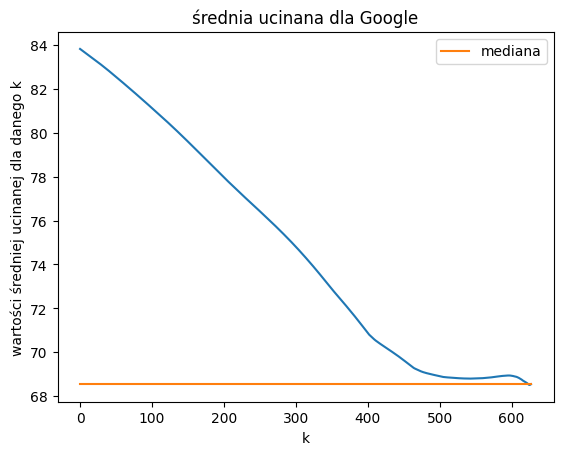

In [43]:
plotTrimmedMean(x_n, "Google")

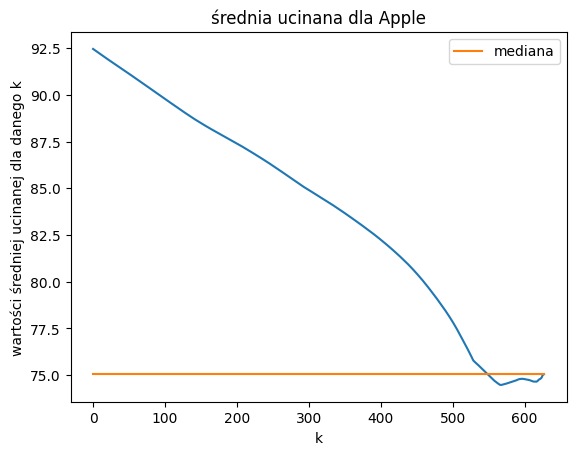

In [44]:
plotTrimmedMean(y_n, "Apple")

In [45]:
def WinsorAverage(Xn, k): # średnia winsorowska
    X = np.sort(Xn)
    n = len(X)
    result = 0
    for i in range (int(k+1), int(n-k-1)):
        result += X[i]
    return ((k)*X[int(k)]+result+(k+1)*X[int(n-k-1)])/n

In [46]:
def plotWinsorAverage(sample, firma):
    k =  np.arange(0, (len(sample)/2)-1, 1)
    W = [WinsorAverage(sample,x) for x in k]
    plt.plot(k, W)
    plt.plot(k, [np.median(sample) for x in k], label="mediana")
    plt.title("średnia winsorowska dla {}".format(firma))
    plt.xlabel("k")
    plt.ylabel("wartości średniej winsorowskiej dla danego k")
    plt.legend()
    plt.show()

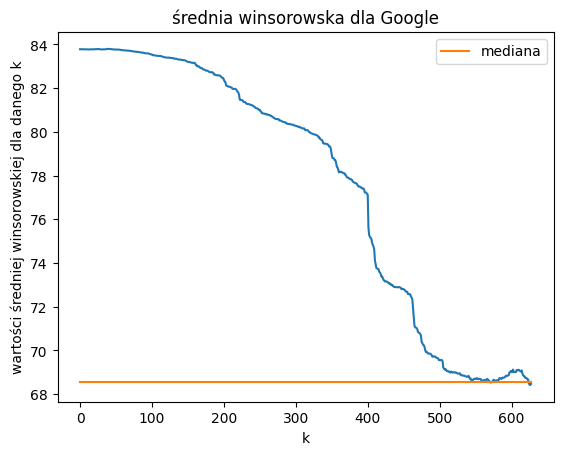

In [47]:
plotWinsorAverage(x_n, "Google")

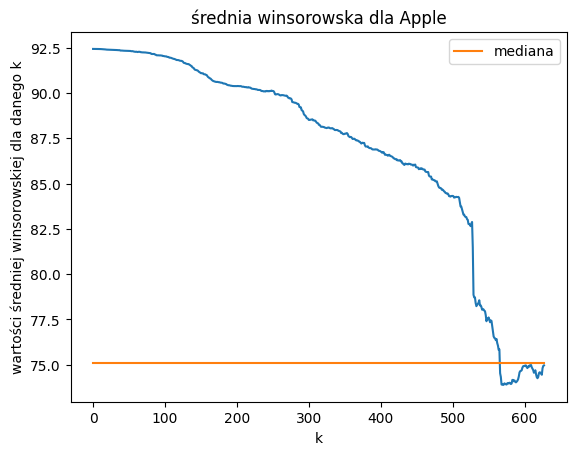

In [48]:
plotWinsorAverage(y_n, "Apple")

In [50]:
np.median(x_n), np.median(y_n)

(68.57059849999999, 75.0674975)

In [53]:
np.quantile(x_n, 0.25), np.quantile(y_n, 0.25)

(57.114000499999996, 47.99312475)

In [54]:
np.quantile(x_n, 0.75), np.quantile(y_n, 0.75)

(114.80749924999999, 136.0049975)

### Miary rozproszenia

In [56]:
max(x_n) - min(x_n), max(y_n) - min(y_n)

(105.99600600000001, 146.510002)

In [57]:
np.quantile(x_n, 0.75) - np.quantile(x_n, 0.25)

57.693498749999996

In [58]:
np.quantile(y_n, 0.75) - np.quantile(y_n, 0.25)

88.01187275000001

In [59]:
np.var(x_n), np.var(y_n)

(1062.55943081887, 2214.125834218712)

In [60]:
np.std(x_n), np.std(y_n)

(32.59692364041229, 47.05449855453474)

In [61]:
def PrzecietneOdchylenieOdSredniej(sample):
    n = len(sample)
    mean = np.mean(sample)
    return np.sum(np.abs(sample-mean))/n  

In [63]:
PrzecietneOdchylenieOdSredniej(x_n), PrzecietneOdchylenieOdSredniej(y_n)

(28.774433725806986, 43.51798224176969)

In [65]:
def VarianceAndStd(observation):
    n = len(observation)
    mean = np.sum(observation)/n
    return np.sum((observation - mean)**2)/(n-1), np.sqrt(np.sum((observation - mean)**2)/(n-1))

In [64]:
def WspolczynnikZmiennosci(sample):
  v, std = VarianceAndStd(sample)
  x = np.mean(sample)
  return std/x *100

In [67]:
WspolczynnikZmiennosci(x_n), WspolczynnikZmiennosci(y_n)

(38.90493186756731, 50.912683743236855)

### Miary asymetrii

In [68]:
def WspolczynnikSkosnosci(sample):
  v, std = VarianceAndStd(sample)
  n = len(sample)
  return (n*np.sum(((sample - np.mean(sample))/std)**3))/((n-1)*(n-2))

In [70]:
WspolczynnikSkosnosci(x_n), WspolczynnikSkosnosci(y_n)

(0.7417586033022995, 0.3901062815481415)

### Miary spłaszczenia

In [18]:
def Kurtoza(sample):
  n = len(sample)
  return 1/n*np.sum((sample - np.mean(sample))**4)/(1/n *np.sum((sample - np.mean(sample))**2))**2

In [19]:
Kurtoza(x_n), Kurtoza(y_n)

(2.01414481889606, 1.5692146151997646)

In [16]:
df = df.sort_values(by = 'x')

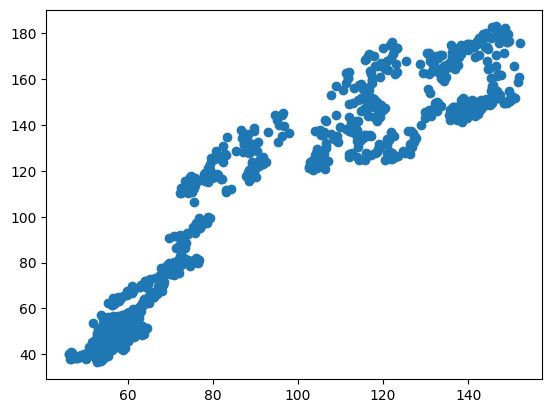

In [17]:
plt.scatter(df["x"], df["y"])

In [20]:
def beta_0(x, y, beta1):
    return np.mean(y) - beta1*np.mean(x)
    

def beta_1 (x, y):
    return np.sum((x -np.mean(x))*(y-np.mean(y)))/(np.sum((x -np.mean(x))**2))

def s_2(y_hat, y):
    n = len(y)
    return np.sum((y - y_hat)**2)/(n-2)

In [21]:
x = df['x']
y = df['y']

x = x.tolist()
y = y.tolist()

In [23]:
len(x)

1258

In [36]:
b0 = 10000
b1 = -2


def przedzial(x, y, b0, b1):
    alfa = 0.05
    x = np.array(x)
    y = np.array(y)
    x_test = x[1200:]
    x_tre = x[:1200]
    y_tre = y[:1200]
    y_test = y[1200:]
    n = len(x_tre)
    sigma = 1
    ei = np.random.normal(0, sigma, size = n)
   # y = np.array(b0 + b1*x_tre + ei)
    b1hat = beta_1(x_tre, y_tre)
    b0hat = beta_0(x_tre, y_tre, b1hat)
    y_hat = b0hat  + b1hat *x_tre + ei
    sig = s_2(y_hat, y_tre)
    sigma = sig**0.5
    p1 = b0hat + b1hat * x_test - scipy.stats.t.ppf(df = n-2, q = 1-alfa/2) *sigma *(1 + 1/n + ((x_test - np.mean(x_tre))**2)/(np.sum((x_tre - np.mean(x_tre))**2)))**0.5
    p2 = b0hat + b1hat * x_test + scipy.stats.t.ppf(df = n-2, q = 1-alfa/2) *sigma *(1 + 1/n + ((x_test - np.mean(x_tre))**2)/(np.sum((x_tre - np.mean(x_tre))**2)))**0.5
       # print(p1, p2)
    
    return p1, p2,b0hat, b1hat

In [39]:
p1, p2,b0, b1 = przedzial(x, y, b0, b1)


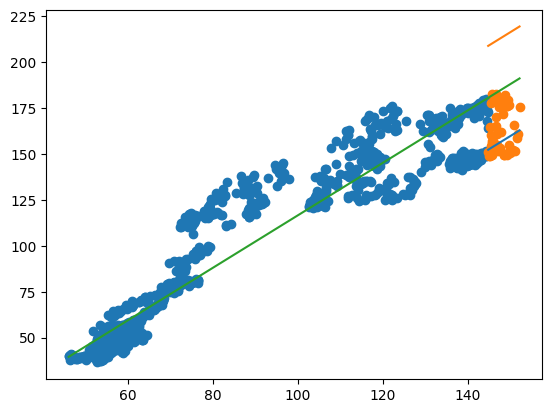

In [40]:
plt.scatter(x[:1200], y[:1200], label = "trenigowe")
plt.scatter(x[1200:], y[1200:], label = "testowe")
plt.plot(x[1200:], p1)
plt.plot(x[1200:], p2)
x = np.array( )
plt.plot(x, b0+b1*x)